## Make histogram for contigs length

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import squarify    # pip install squarify (algorithm for treemap)

## Read & analyse data

In [2]:
binN = 'V40FOF_metabat.1_sub'
#binN = 'V3276M_metabat.4_sub'
#binN = 'V40FOF_maxbin.022'

name = 'NA'
nameG = 'NA'
cl = '100'
ct = '50.16'

In [3]:
#read input
dt = pd.read_csv(f'input/gunc/{binN}.contig_assignments.tsv', sep='\t')

# Choose main genera for each contigs
dts = dt[dt['tax_level'] == 'genus'].drop_duplicates(subset=['contig'], keep='first')
dts[['genus', 'species']] = dts['assignment'].str.split(' ', 1, expand=True)

#save intermidiate table
dts.to_csv('results/gunc/intermidiate_table_'+str(binN)+'.csv', index=False)
dts = dts.sort_values(by=['count_of_genes_assigned'], ascending=False)

dts.head(5)


/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_13746/1479738883.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dts[['genus', 'species']] = dts['assignment'].str.split(' ', 1, expand=True)


,contig,tax_level,assignment,count_of_genes_assigned,genus,species
1173,k141_6245,genus,1730 Eubacterium,235,1730,Eubacterium
970,k141_85190,genus,1730 Eubacterium,212,1730,Eubacterium
832,k141_173935,genus,28050 Lachnospira,183,28050,Lachnospira
1143,k141_74799,genus,28050 Lachnospira,153,28050,Lachnospira
802,k141_49829,genus,28050 Lachnospira,149,28050,Lachnospira


In [4]:
sp = dts.groupby(['species']).sum().sort_values(by=['count_of_genes_assigned'], ascending=False)
sp

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_13746/304513679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp = dts.groupby(['species']).sum().sort_values(by=['count_of_genes_assigned'], ascending=False)


,count_of_genes_assigned
species,
Eubacterium,1719
Lachnospira,1269
Lachnoclostridium,4
Pseudobutyrivibrio,1


## Draw plot for chosen bin

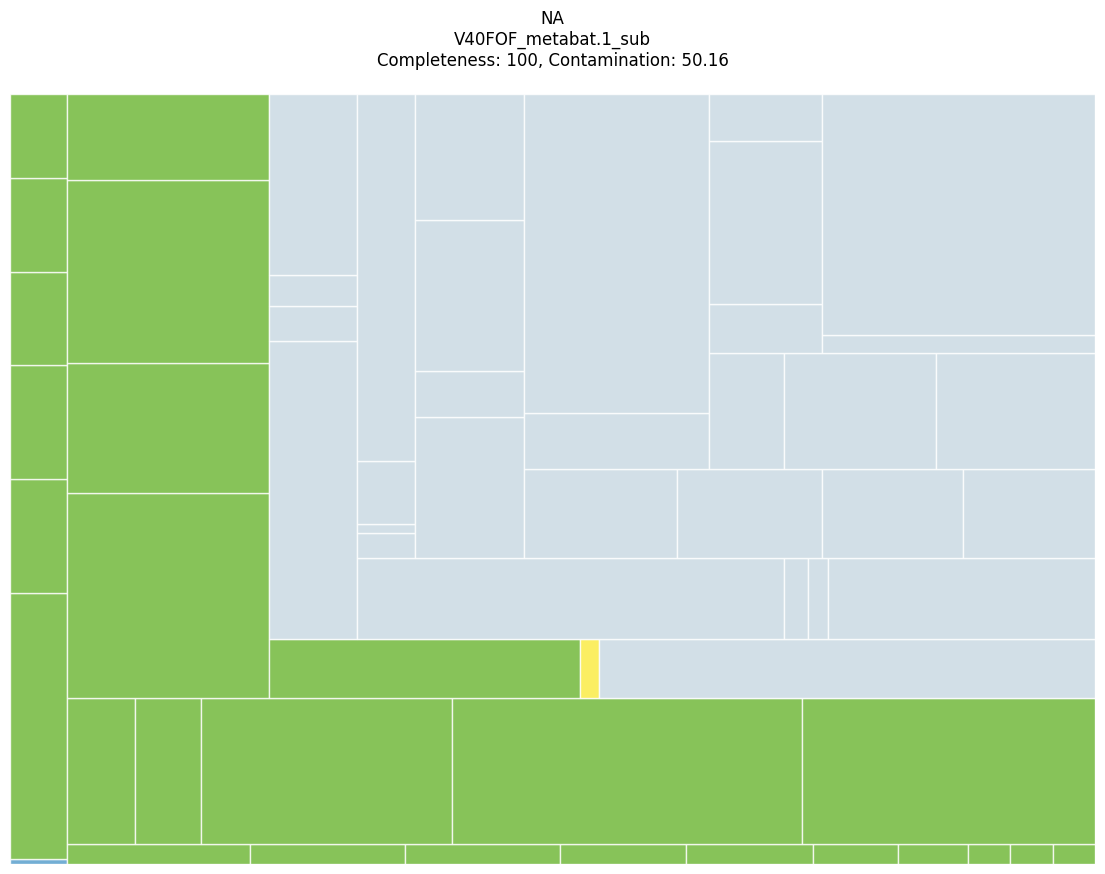

In [5]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

dts = dts.sort_values(by=['species'], ascending=False)

# Create a color mapping for species
#species_colors = sns.color_palette("Set3", len(dts['species'].unique()))
species_colors = ['#509aca', '#69b42f', '#faea3b', '#c7d7e2', '#e3edcf', '#eae9df']
species_color_dict = dict(zip(dts['species'].unique(), species_colors))
dts['color'] = dts['species'].map(species_color_dict)

# Create a figure
plt.figure(2, figsize=(14, 10))

# Plot the squarify chart with colors based on species and default labels
squarify.plot(sizes=dts['count_of_genes_assigned'], color=dts['color'], alpha=0.8, edgecolor="white")

# Turn off axis
plt.axis('off')

# Set the title
plt.title(f'{name}\n{binN}\nCompleteness: {cl}, Contamination: {ct}\n')

# Save the plot as an SVG file
plt.savefig(f'results/gunc/{binN}_0.svg', dpi=150)


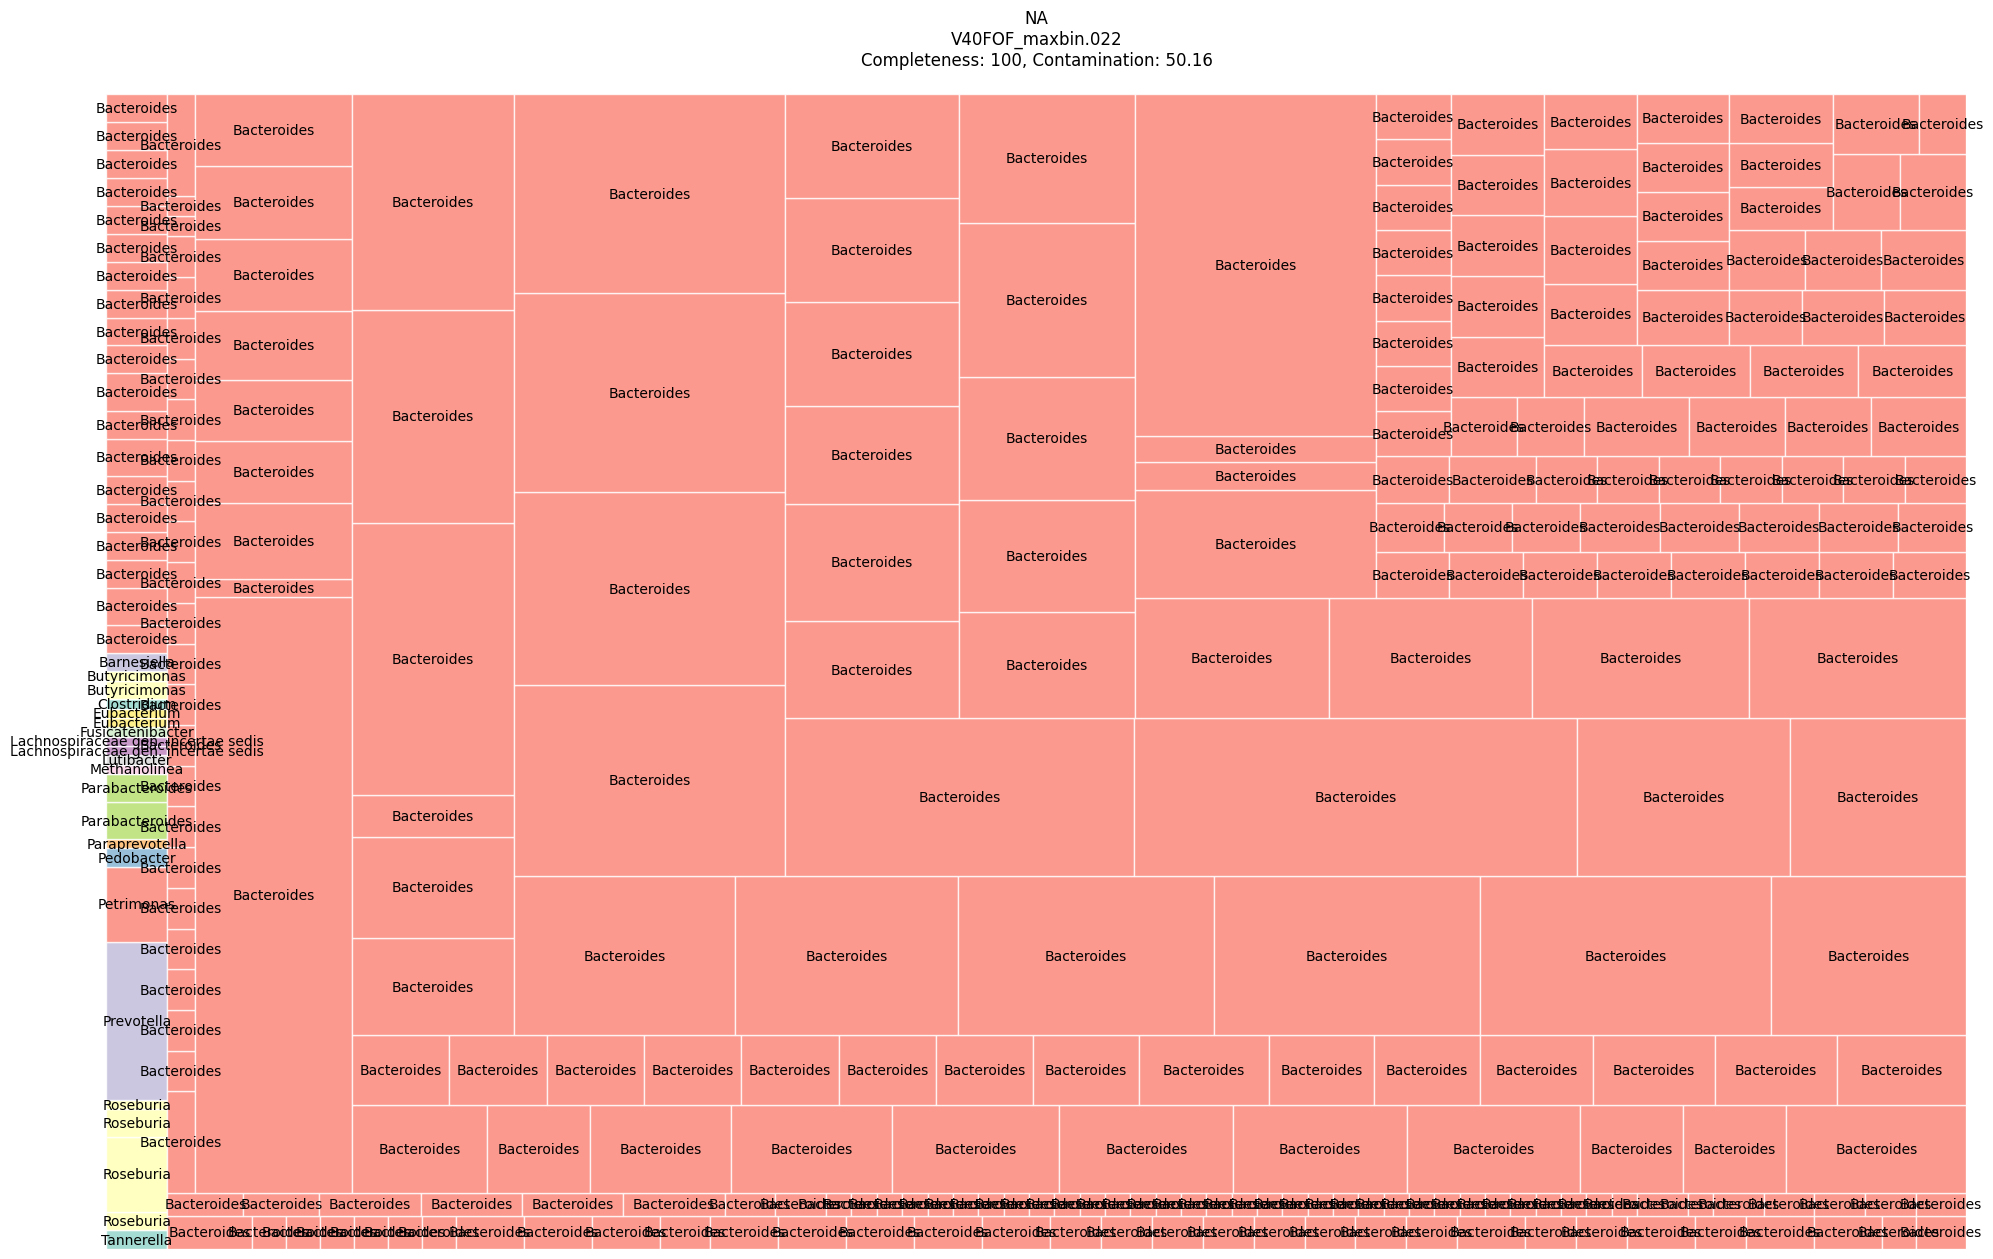

In [83]:
# Create a figure
plt.figure(2, figsize=(24, 15))

# Plot the squarify chart with colors based on species and default labels
squarify.plot(sizes=dts['count_of_genes_assigned'], color=dts['color'], alpha=0.8,label=dts['species'], edgecolor="white")

# Turn off axis
plt.axis('off')

# Set the title
plt.title(f'{name}\n{binN}\nCompleteness: {cl}, Contamination: {ct}\n')

# Save the plot as an SVG file
plt.savefig(f'results/gunc/{binN}_1.svg', dpi=150)

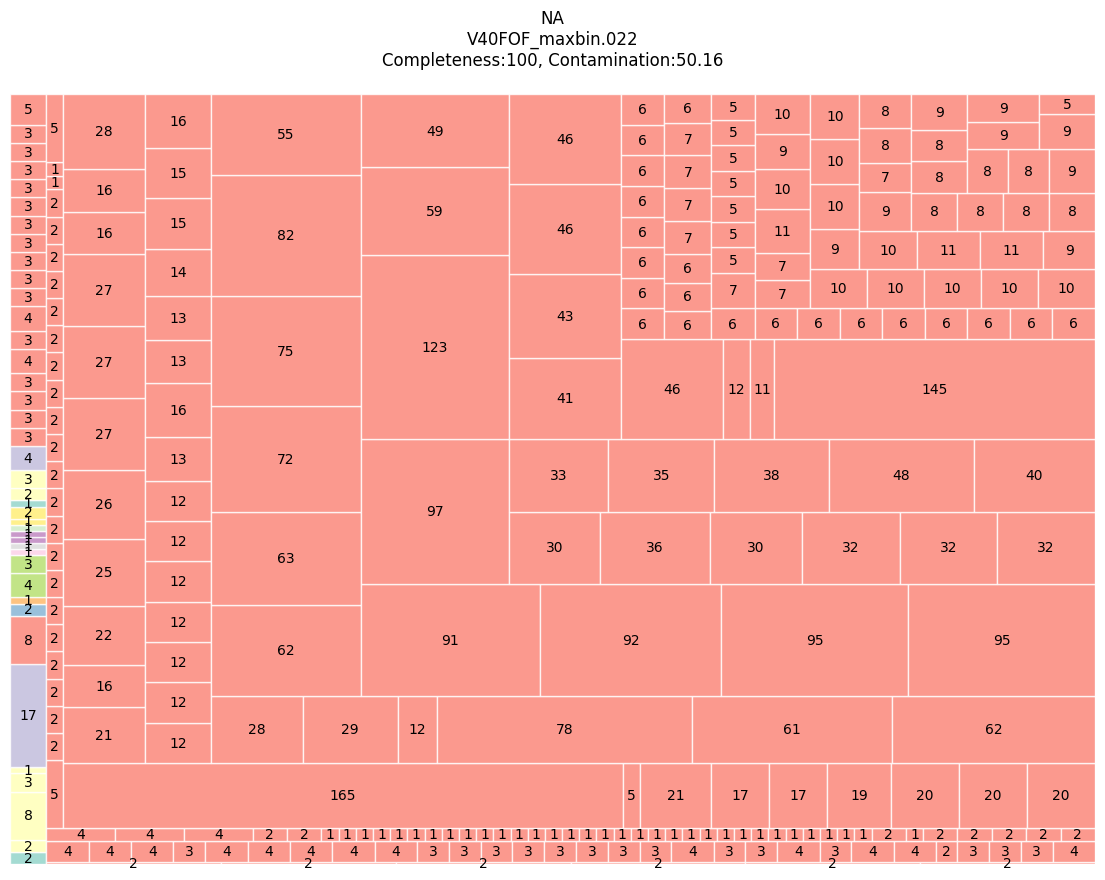

In [84]:
#make a plot only for contamination
dtsCont = dts[dts['genus'] != nameG]
plt.figure(2, figsize=(14,10))

squarify.plot(sizes=dtsCont['count_of_genes_assigned'], color=dts['color'], 
              alpha=.8,label=dtsCont['count_of_genes_assigned'], edgecolor="white")
plt.axis('off')
plt.title(str(name)+'\n'+str(binN)+'\n'+'Completeness:'+str(cl)+', Contamination:'+str(ct)+'\n')
plt.savefig('results/gunc/'+str(binN)+'_2.svg', dpi=150)

## Picture with a coverage

### we need additional files:

- *V40FOF_metabat.1_sub_CG.txt* - made with seqkit
- *V40FOF_metabat.1_sub_contigs_cov.txt* - made with Bins metrisc. Needs contigs list for the bin.

In [7]:
dts.head(2)

,contig,tax_level,assignment,count_of_genes_assigned,genus,species,color
1394,k141_62539,genus,46205 Pseudobutyrivibrio,1,46205,Pseudobutyrivibrio,#509aca
499,k141_93122,genus,28050 Lachnospira,54,28050,Lachnospira,#69b42f


In [8]:
cg = pd.read_csv('input/gunc/'+str(binN)+'_CG.txt', sep='\t')
cg = cg[['file','GC(%)']]
dt = dts.merge(cg, left_on='contig', right_on='file', how='left')
dt['cg'] = dt['GC(%)']*-1

dt.head(2)

,contig,tax_level,assignment,count_of_genes_assigned,genus,species,color,file,GC(%),cg
0,k141_62539,genus,46205 Pseudobutyrivibrio,1,46205,Pseudobutyrivibrio,#509aca,k141_62539,35.94,-35.94
1,k141_93122,genus,28050 Lachnospira,54,28050,Lachnospira,#69b42f,k141_93122,36.56,-36.56


In [9]:
cov = pd.read_csv(f'input/gunc/{binN}_contigs_cov.txt', sep='\t')
mrg = dt.merge(cov, left_on='contig', right_on='contig_name', how='inner').sort_values(by=['species'], ascending=False)

mrg['contig_len'] = mrg['contig_len']/1000
mrg = mrg.loc[mrg.index.repeat(mrg.contig_len)].reset_index(drop=True)
mrg.head(2)

,contig,tax_level,assignment,count_of_genes_assigned,genus,species,color,file,GC(%),cg,contig_name,contig_len,contig_cov
0,k141_62539,genus,46205 Pseudobutyrivibrio,1,46205,Pseudobutyrivibrio,#509aca,k141_62539,35.94,-35.94,k141_62539,3.996,77.1308
1,k141_62539,genus,46205 Pseudobutyrivibrio,1,46205,Pseudobutyrivibrio,#509aca,k141_62539,35.94,-35.94,k141_62539,3.996,77.1308


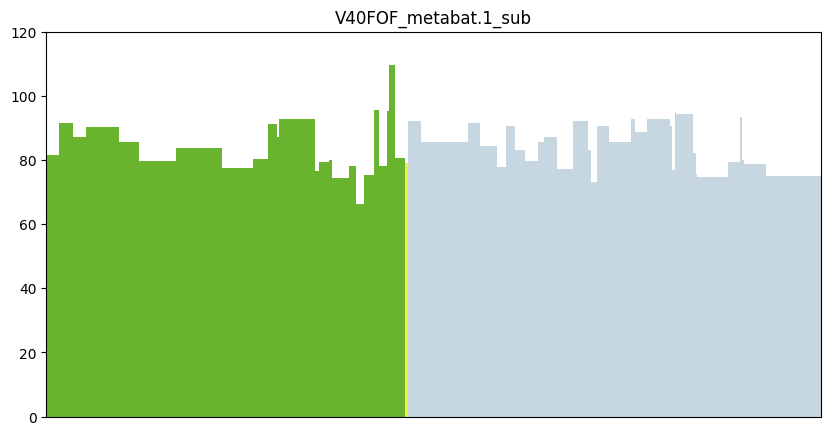

In [10]:
plt.figure(figsize=(10, 5))

mrg['contig_cov'].plot(kind='bar', color=mrg['color'], width=1)
plt.xticks([])
plt.ylim(0,120)
plt.title(binN)

plt.savefig('results/gunc/'+binN+'.svg')

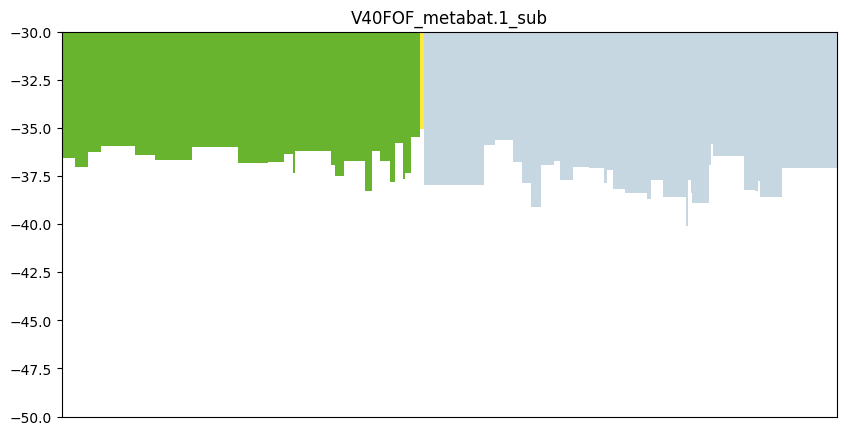

In [11]:
plt.figure(figsize=(10, 5))

mrg['cg'].plot(kind='bar', color=mrg['color'], width=1)
plt.xticks([])
plt.ylim(-50,-30)
plt.title(binN)

plt.savefig('results/gunc/CG_'+binN+'.svg')